In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import cv2
import random
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                      Class  Train Image Count  Validation Image Count
0             American_Crow                 53                       7
1       Black_billed_Cuckoo                 55                       5
2                  Bobolink                 58                       2
3          Brandt_Cormorant                 53                       6
4          Brewer_Blackbird                 55                       4
5           Bronzed_Cowbird                 52                       8
6             Brown_Creeper                 52                       7
7            Eastern_Towhee                 54                       6
8                 Fish_Crow                 54                       6
9              Gray_Catbird                 54                       5
10  Gray_crowned_Rosy_Finch                 51                       8
11        Groove_billed_Ani                 58                       2
12           Indigo_Bunting                 57                       3
13    

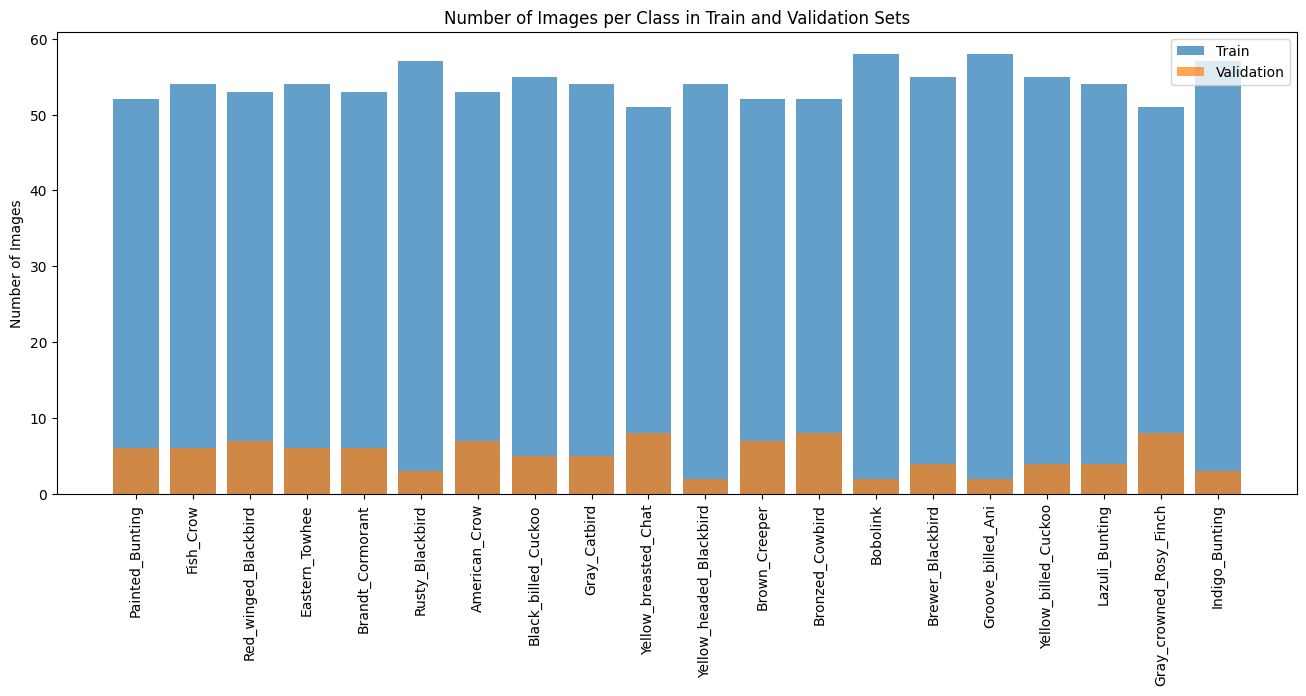

Displaying 5 sample images from class: Indigo_Bunting


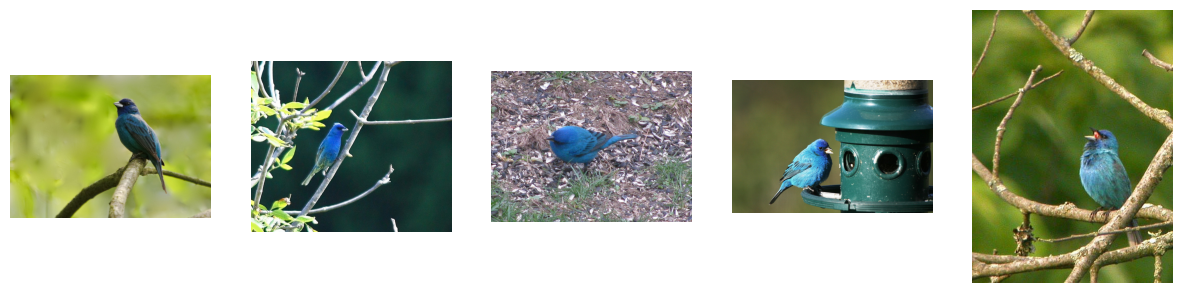

In [2]:
# Paths to the dataset
train_dir = "/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images"
val_dir = "/kaggle/input/bdma-07-competition/BDMA7_project_files/val_images"
train_metadata_path = "/kaggle/input/bdma-07-competition/BDMA7_project_files/train_metadata.csv"
val_metadata_path = "/kaggle/input/bdma-07-competition/BDMA7_project_files/val_metadata.csv"

# Function to count images in each class directory
def count_images_in_classes(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in training and validation sets
train_class_counts = count_images_in_classes(train_dir)
val_class_counts = count_images_in_classes(val_dir)

# Display the counts as a DataFrame
train_counts_df = pd.DataFrame(list(train_class_counts.items()), columns=['Class', 'Train Image Count'])
val_counts_df = pd.DataFrame(list(val_class_counts.items()), columns=['Class', 'Validation Image Count'])

# Merge counts into a single DataFrame for comparison
class_counts_df = pd.merge(train_counts_df, val_counts_df, on='Class', how='outer').fillna(0)

# Display the DataFrame
print(class_counts_df)

# Plot the distribution of images per class
plt.figure(figsize=(16, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), alpha=0.7, label="Train")
plt.bar(val_class_counts.keys(), val_class_counts.values(), alpha=0.7, label="Validation")
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Train and Validation Sets")
plt.legend()
plt.show()# Function to display sample images from a random class
def display_sample_images(data_dir, num_samples=5):
    classes = os.listdir(data_dir)
    random_class = random.choice(classes)
    class_path = os.path.join(data_dir, random_class)
    
    print(f"Displaying {num_samples} sample images from class: {random_class}")
    sample_images = random.sample(os.listdir(class_path), min(num_samples, len(os.listdir(class_path))))
    
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# Display sample images from the train set
display_sample_images(train_dir)

Displaying Random Images from Training Set


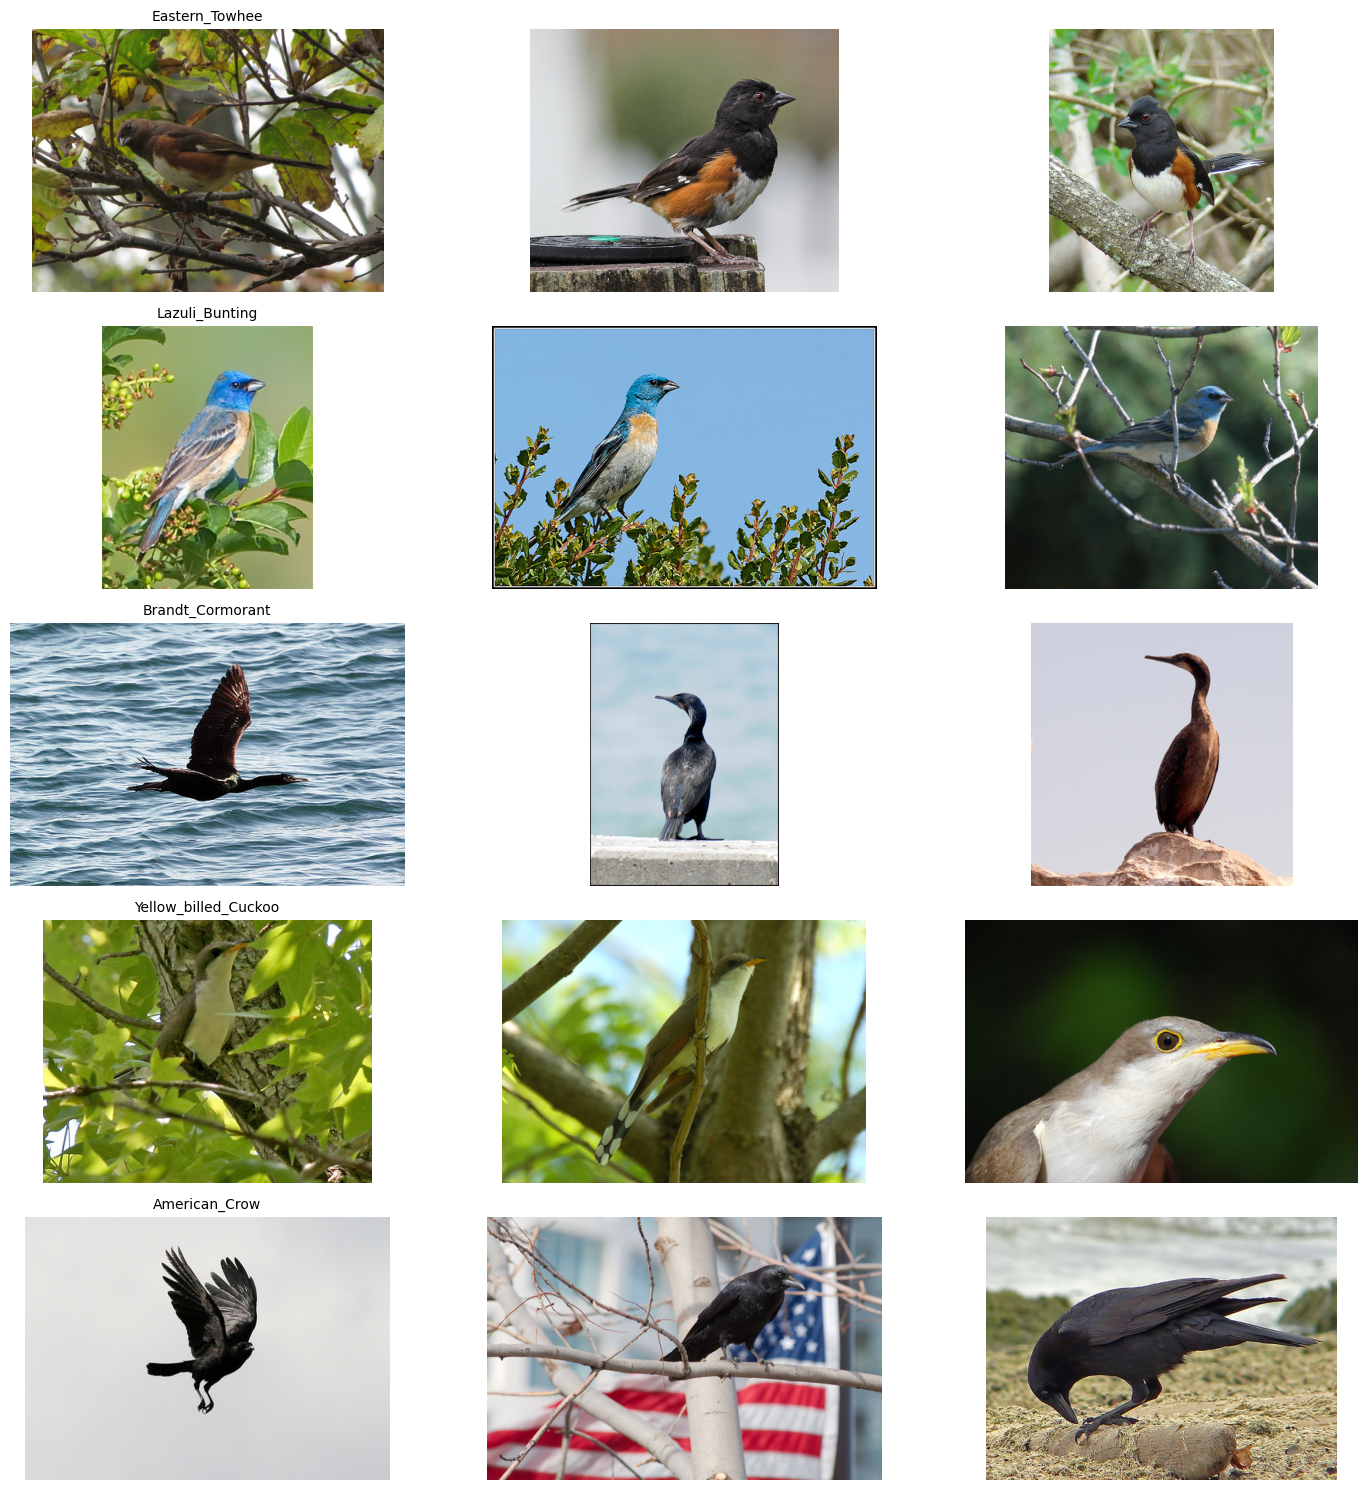

In [3]:
# Display grid of random images from multiple classes
def display_random_images(data_dir, num_classes=5, num_samples=3):
    classes = random.sample(os.listdir(data_dir), num_classes)
    plt.figure(figsize=(15, num_classes * 3))
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            sample_images = random.sample(os.listdir(class_path), min(num_samples, len(os.listdir(class_path))))
            for j, img_name in enumerate(sample_images):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    plt.subplot(num_classes, num_samples, i * num_samples + j + 1)
                    plt.imshow(img)
                    plt.axis("off")
                    if j == 0:
                        plt.title(class_name, fontsize=10)
                except Exception as e:
                    print(f"Error reading image {img_name}: {e}")
    plt.tight_layout()
    plt.show()

print("Displaying Random Images from Training Set")
display_random_images("/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images")

Class Distribution - Training Set


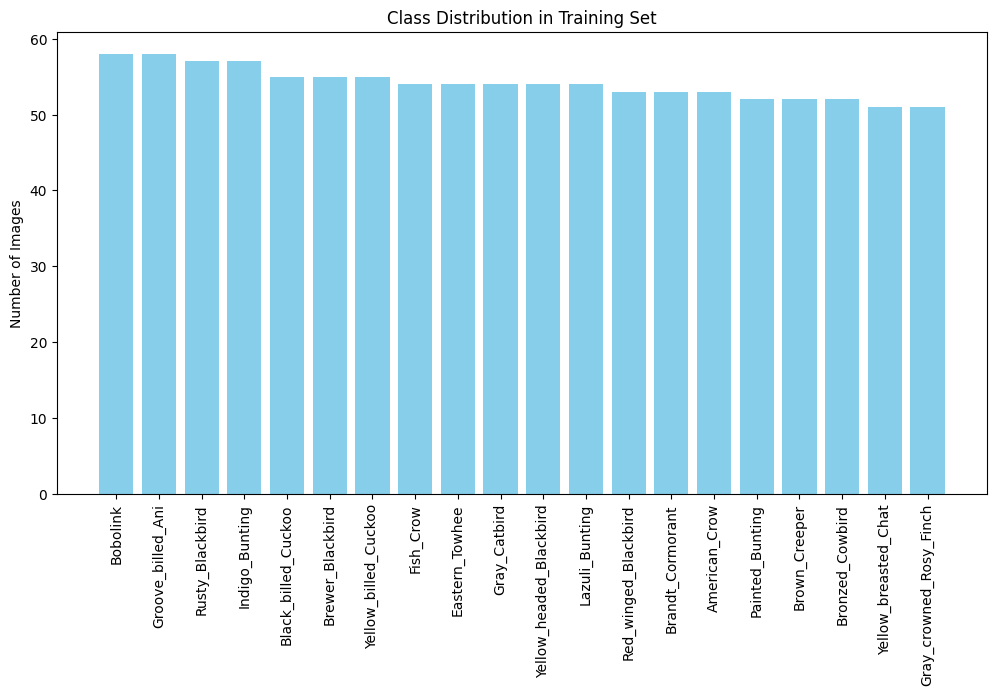

Class Distribution - Validation Set


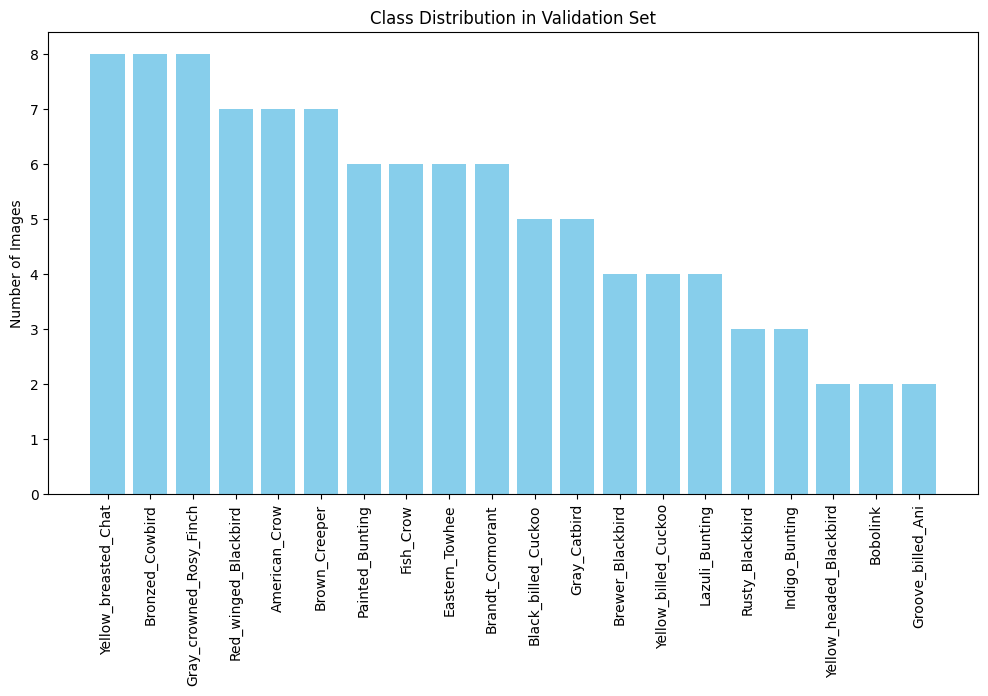

In [4]:
import numpy as np
import pandas as pd

# Plot class distribution
def plot_class_distribution(data_dir, title):
    class_counts = count_images_in_classes(data_dir)
    class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))
    
    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xticks(rotation=90)
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.show()

# Perform EDA
print("Class Distribution - Training Set")
plot_class_distribution("/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images", "Class Distribution in Training Set")
print("Class Distribution - Validation Set")
plot_class_distribution("/kaggle/input/bdma-07-competition/BDMA7_project_files/val_images", "Class Distribution in Validation Set")

Analyzing Image Properties - Training Set


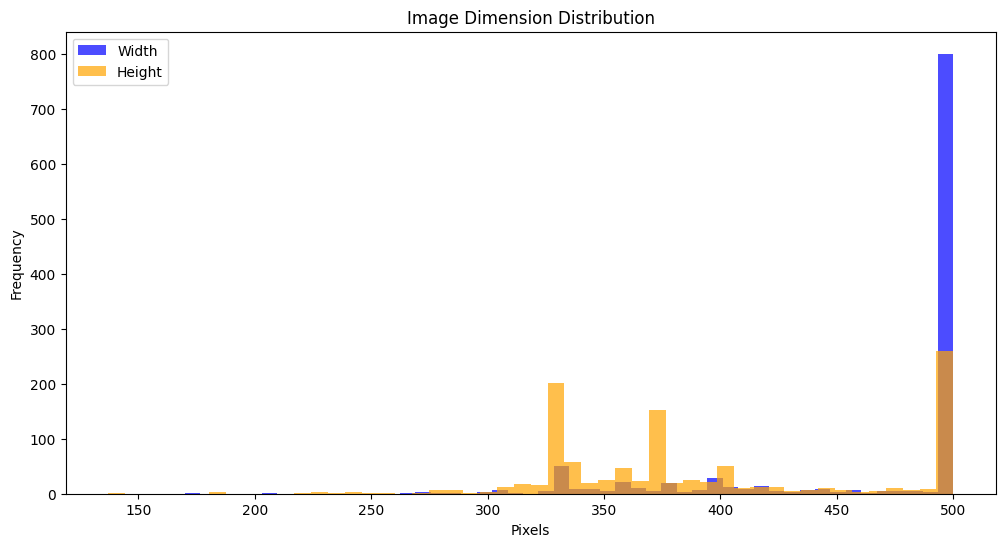

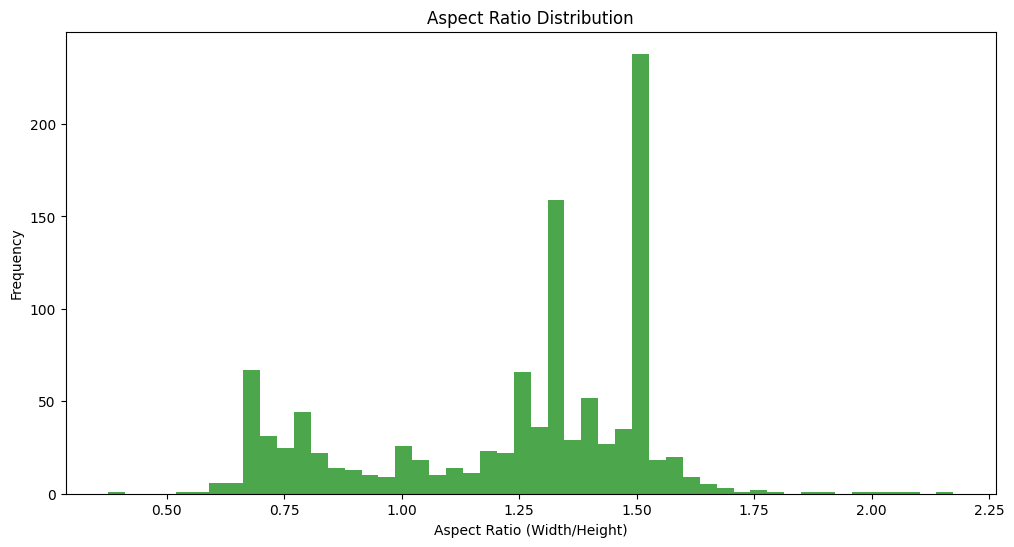

             Width       Height
count  1082.000000  1082.000000
mean    468.229205   395.025878
std      59.695443    71.003246
min     170.000000   137.000000
25%     477.500000   333.000000
50%     500.000000   375.000000
75%     500.000000   482.750000
max     500.000000   500.000000


In [5]:
# Analyze image dimensions and aspect ratios
def analyze_image_properties(data_dir):
    image_dimensions = []
    aspect_ratios = []
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        h, w = img.shape[:2]
                        image_dimensions.append((w, h))
                        aspect_ratios.append(w / h)
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
    
    # Convert to DataFrame for analysis
    dim_df = pd.DataFrame(image_dimensions, columns=["Width", "Height"])
    
    # Plot image size distribution
    plt.figure(figsize=(12, 6))
    plt.hist(dim_df["Width"], bins=50, alpha=0.7, label="Width", color='blue')
    plt.hist(dim_df["Height"], bins=50, alpha=0.7, label="Height", color='orange')
    plt.xlabel("Pixels")
    plt.ylabel("Frequency")
    plt.title("Image Dimension Distribution")
    plt.legend()
    plt.show()
    
    # Plot aspect ratio distribution
    plt.figure(figsize=(12, 6))
    plt.hist(aspect_ratios, bins=50, color='green', alpha=0.7)
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.title("Aspect Ratio Distribution")
    plt.show()
    
    print(dim_df.describe())

print("Analyzing Image Properties - Training Set")
analyze_image_properties("/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images")

In [6]:
# Check for corrupted images
def check_corrupted_images(data_dir):
    corrupted_files = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        corrupted_files.append(img_path)
                except Exception as e:
                    corrupted_files.append(img_path)
    
    if corrupted_files:
        print(f"Found {len(corrupted_files)} corrupted images.")
        for file in corrupted_files[:10]:  # Display only the first 10 corrupted files
            print(file)
    else:
        print("No corrupted images found.")


print("Checking for Corrupted Images - Training Set")
check_corrupted_images("/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images")

Checking for Corrupted Images - Training Set
No corrupted images found.


In [7]:
# Analyze metadata (if available)
def analyze_metadata(metadata_path):
    if os.path.exists(metadata_path):
        metadata = pd.read_csv(metadata_path)
        print(f"Metadata ({metadata_path}) Overview:")
        print(metadata.info())
        print(metadata.describe())
        print(metadata.head())
    else:
        print(f"Metadata file {metadata_path} not found.")

print("Analyzing Metadata - Training Set")
analyze_metadata("/kaggle/input/bdma-07-competition/BDMA7_project_files/train_metadata.csv")

Analyzing Metadata - Training Set
Metadata (/kaggle/input/bdma-07-competition/BDMA7_project_files/train_metadata.csv) Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       1082 non-null   object
 1   class      1082 non-null   object
 2   class_idx  1082 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.5+ KB
None
         class_idx
count  1082.000000
mean      9.388170
std       5.761123
min       0.000000
25%       4.000000
50%       9.000000
75%      14.000000
max      19.000000
                                               path             class  \
0  Brandt_Cormorant/Brandt_Cormorant_0071_23007.jpg  Brandt_Cormorant   
1  Brandt_Cormorant/Brandt_Cormorant_0028_22892.jpg  Brandt_Cormorant   
2  Brandt_Cormorant/Brandt_Cormorant_0076_23021.jpg  Brandt_Cormorant   
3  Brandt_Cormorant/Brandt_Cormorant_0080_23002.jpg 

Found 1082 images belonging to 20 classes.
Found 103 images belonging to 20 classes.
Found 400 images belonging to 1 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Starting Initial Training
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.3735 - loss: 2.2063 - val_accuracy: 0.7379 - val_loss: 0.9102
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 323ms/step - accuracy: 0.7653 - loss: 0.6890 - val_accuracy: 0.7864 - val_loss: 0.9038
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.8240 - loss: 0.5475 - val_accuracy: 0.7573 - val_loss: 0.7979
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 320ms/step - accuracy: 0.8821 - loss: 0.3449 - val_accuracy: 0.8155 - val_loss: 0.7605
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.9049 - loss: 0.3021 - val_accuracy: 0.7670 - val_loss: 0.7897
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.9188 - loss: 0.2580 - val_accuracy: 0.7864 - val_loss: 0.7586
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.9529 - loss: 0.1645 - val_accuracy: 0.7670 - val_loss: 0.7870
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.9515 - loss: 0.1747 - val_accuracy: 0.805

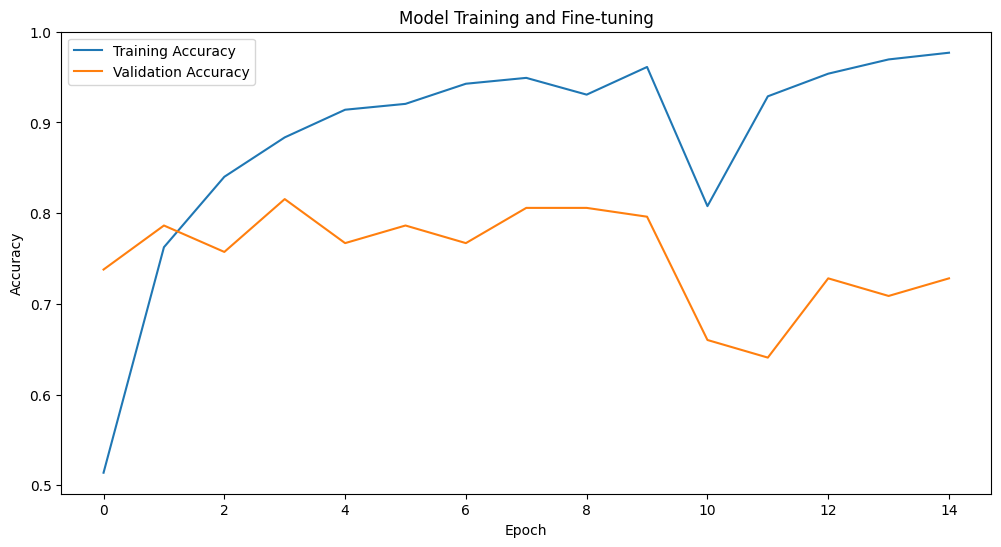

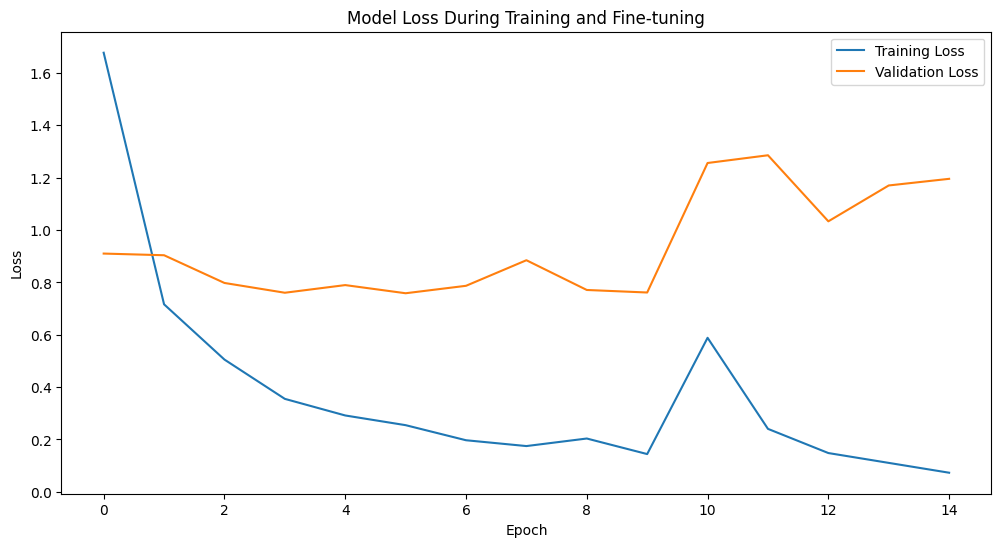

In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Paths
train_dir = '/kaggle/input/bdma-07-competition/BDMA7_project_files/train_images'
val_dir = '/kaggle/input/bdma-07-competition/BDMA7_project_files/val_images'
test_dir = '/kaggle/input/bdma-07-competition/BDMA7_project_files/test_images'
submission_path = '/kaggle/input/bdma-07-competition/BDMA7_project_files/sample_submission.csv'

# Load submission template
submission = pd.read_csv(submission_path)

# Parameters
IMG_SIZE = (224, 224)  # Image size for MobileNetV2
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir(train_dir))

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=1,  # Single image at a time
    class_mode=None,
    shuffle=False  # Maintain order for submission
)

# Load Pretrained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (initial training)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Starting Initial Training")
history_initial = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Unfreeze all layers for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Compile again with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model (fine-tuning)
print("Starting Fine-tuning")
history_fine_tune = model.fit(
    train_generator,
    initial_epoch=len(history_initial.history['loss']),  # Start from the next epoch
    epochs=len(history_initial.history['loss']) + 10,   # Continue epochs numbering
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Merge histories for analysis
def merge_histories(hist1, hist2):
    merged_history = {}
    for key in hist1.history.keys():
        merged_history[key] = hist1.history[key] + hist2.history[key]
    return merged_history

# Combine the histories
merged_history = merge_histories(history_initial, history_fine_tune)

# Plot combined training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_history['accuracy'], label='Training Accuracy')
plt.plot(merged_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Fine-tuning')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(merged_history['loss'], label='Training Loss')
plt.plot(merged_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss During Training and Fine-tuning')
plt.legend()
plt.show()

In [9]:
# Generate predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# Map class indices to labels
class_indices = train_generator.class_indices
label_to_index = {label: idx for label, idx in class_indices.items()}

# Get predicted class indices for test set
predicted_classes = [np.argmax(pred) for pred in predictions]

# Get the image file paths from the test generator and strip folder names
test_image_paths = [os.path.basename(path) for path in test_generator.filenames]  # Extract only the file name

# Create a DataFrame for submission
submission = pd.DataFrame({
    'path': test_image_paths,
    'class_idx': predicted_classes
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Baseline model complete. Submission file saved as 'submission.csv'.")

400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Baseline model complete. Submission file saved as 'submission.csv'.
